In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import missingno as msno

# 2. 전처리
## 2-1. 결측치 처리
- 0이나 특정 상수로 대치, 대푯값, 단순확률대치법, 다른 변수들로부터 모델링햐여 결측값 예측, 결측값 여부를 새로운 특징으로 추출, 보간법(시계열)
- 데이터 양에 비해 결측치가 극소수이거나, 절대다수인 경우 결측치가 있는 행이나 열 자체를 삭제하기도 함

### 결측치 확인

In [6]:
wine = pd.read_csv("https://raw.githubusercontent.com/algoboni/pythoncodebook1-1/main/2-1_wine.csv",
                  index_col=0).filter(['Alcohol', 'Malicacid', 'Ash', 'Magnesium', 'Hue'])

print(wine.isna().sum())

Alcohol      0
Malicacid    0
Ash          0
Magnesium    0
Hue          0
dtype: int64


In [7]:
# 임의 결측치 데이터 생성
from numpy.random import randint
wine_m = wine.copy()
for col in ['Alcohol', 'Ash']:
    random_idx = randint(0, len(wine), 25)
    wine_m.loc[random_idx, col] = np.nan
print(wine_m.isna().sum())

Alcohol      24
Malicacid     0
Ash          24
Magnesium     0
Hue           0
dtype: int64


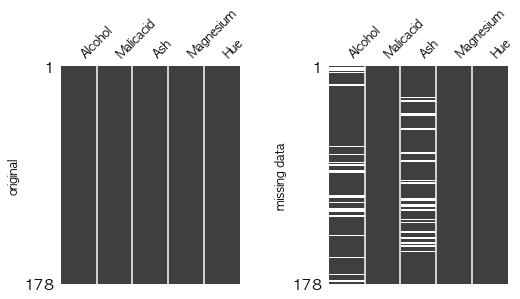

In [14]:
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['font.family'] = "AppleGothic"
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(1,2, figsize=(8,4))
plt.subplots_adjust(wspace=0.5)

msno.matrix(df=wine, figsize=(5,5), fontsize=12, ax=ax[0], sparkline=False)
ax[0].set_ylabel("original");

msno.matrix(df=wine_m, figsize=(5,5), fontsize=12, ax=ax[1], sparkline=False)
ax[1].set_ylabel("missing data");

plt.show()

### Zero imputation & Constant imputation

In [15]:
wine_m[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,NaN,2.14
2,NaN,2.67
3,NaN,2.50
4,13.24,2.87
5,NaN,2.45
6,14.39,2.45
7,14.06,2.61
8,14.83,2.17
9,13.86,2.27


In [16]:
wine_imp = wine_m.fillna(0)
wine_imp[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,0.00,2.14
2,0.00,2.67
3,0.00,2.50
4,13.24,2.87
5,0.00,2.45
6,14.39,2.45
7,14.06,2.61
8,14.83,2.17
9,13.86,2.27


### 대푯값으로 채우는 방법
- 해당 변수의 결측되지 않은 다른 값들로 구한 평균값, 중앙값, 최빈값 등의 대푯값으로 결측치 대치
- 로그 변환 등을 통해 치우침이 적은 분포로 데이터 변환 후, 대푯값 구해 대치

In [17]:
wine_m[['Alcohol', 'Ash']].head(10)

,Alcohol,Ash
0,14.23,2.43
1,NaN,2.14
2,NaN,2.67
3,NaN,2.50
4,13.24,2.87
5,NaN,2.45
6,14.39,2.45
7,14.06,2.61
8,14.83,2.17
9,13.86,2.27


In [20]:
from sklearn.impute import SimpleImputer

# strategy = 'mean', 'median', or 'most_frequent'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
wine_imp1 = imputer.fit_transform(wine_m)
wine_imp1 = pd.DataFrame(wine_imp1, columns=wine_m.columns)

al_mean = wine_m['Alcohol'].mean()
as_mean = wine_m['Ash'].mean()

print(f'alcohol mean: {al_mean:.2f}, ash mean: {as_mean:.2f}')
print(wine_imp1[['Alcohol', 'Ash']].head(10).round(2))

alcohol mean: 13.02, ash mean: 2.36
   Alcohol   Ash
0    14.23  2.43
1    13.02  2.14
2    13.02  2.67
3    13.02  2.50
4    13.24  2.87
5    13.02  2.45
6    14.39  2.45
7    14.06  2.61
8    14.83  2.17
9    13.86  2.27
